In [8]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [5]:
# ==============================
# HR Data Analysis Project
# ==============================

# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset
df = pd.read_excel("C:/Users/myaka/Documents/HR Analysis dashboard/hr_data.xlsx")

# Step 3: Initial overview
print("----- Dataset Information -----")
print(df.info())
print("\nFirst 5 Rows:\n", df.head())

# Step 4: Remove duplicate records
df.drop_duplicates(inplace=True)

# Step 5: Check for missing values
print("\n----- Missing Values per Column -----")
print(df.isnull().sum())

# Step 6: Convert categorical 'Attrition' column (Yes/No → 1/0)
if 'Attrition' in df.columns:
    df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# Step 7: Verify conversion
print("\nAttrition Value Counts:\n", df['Attrition'].value_counts())


----- Dataset Information -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Attrition                   1470 non-null   object
 1   Business Travel             1470 non-null   object
 2   CF_age band                 1470 non-null   object
 3   CF_attrition label          1470 non-null   object
 4   Department                  1470 non-null   object
 5   Education Field             1470 non-null   object
 6   emp no                      1470 non-null   object
 7   Employee Number             1470 non-null   int64 
 8   Gender                      1470 non-null   object
 9   Job Role                    1470 non-null   object
 10  Marital Status              1470 non-null   object
 11  Over Time                   1470 non-null   object
 12  Over18                      1470 non-null   object
 13  Training Times L

In [29]:
# ==============================
# Exploratory Data Analysis (EDA)
# ==============================

print("\n----- Basic Statistics -----")
print(df.describe())

# Calculate Attrition Rate
attrition_rate = df['Attrition'].mean() * 100
print(f"\nOverall Attrition Rate: {attrition_rate:.2f}%")

#  Attrition by Department
if 'Department' in df.columns:
    dept_attrition = df.groupby('Department')['Attrition'].mean() * 100
    print("\nAttrition by Department (%):\n", dept_attrition)

# Attrition by Gender
if 'Gender' in df.columns:
    gender_attrition = df.groupby('Gender')['Attrition'].mean() * 100
    print("\nAttrition by Gender (%):\n", gender_attrition)

# Attrition by Age Group
if 'Age' in df.columns:
    df['AgeGroup'] = pd.cut(df['Age'], bins=[18, 25, 35, 45, 55, 65], 
                            labels=['18-25', '26-35', '36-45', '46-55', '56-65'])
    age_attrition = df.groupby('AgeGroup')['Attrition'].mean() * 100
    print("\nAttrition by Age Group (%):\n", age_attrition)



----- Basic Statistics -----
         Attrition  Employee Number  Training Times Last Year          Age  \
count  1470.000000      1470.000000               1470.000000  1470.000000   
mean      0.161224      1024.865306                  2.799320    36.923810   
std       0.367863       602.024335                  1.289271     9.135373   
min       0.000000         1.000000                  0.000000    18.000000   
25%       0.000000       491.250000                  2.000000    30.000000   
50%       0.000000      1020.500000                  3.000000    36.000000   
75%       0.000000      1555.750000                  3.000000    43.000000   
max       1.000000      2068.000000                  6.000000    60.000000   

       CF_current Employee   Daily Rate  Distance From Home  Employee Count  \
count          1470.000000  1470.000000         1470.000000          1470.0   
mean              0.838776   802.485714            9.192517             1.0   
std               0.367863   4

C:\Users\myaka\AppData\Local\Temp\ipykernel_18280\3488977004.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_attrition = df.groupby('AgeGroup')['Attrition'].mean() * 100


C:\Users\myaka\AppData\Local\Temp\ipykernel_18280\201077034.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Attrition', data=df, palette='coolwarm')


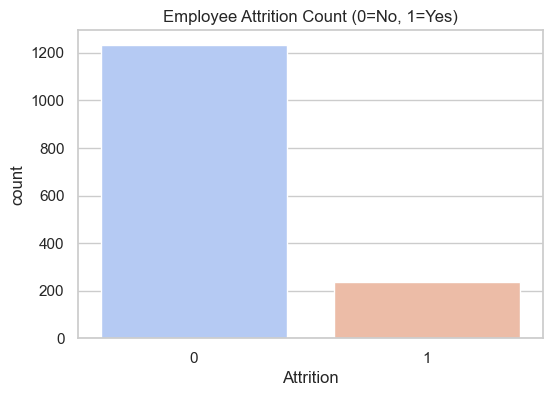

In [7]:
# ==============================
# Data Visualization
# ==============================

sns.set(style="whitegrid")

# 1️⃣ Attrition Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Attrition', data=df, palette='coolwarm')
plt.title("Employee Attrition Count (0=No, 1=Yes)")
plt.show()

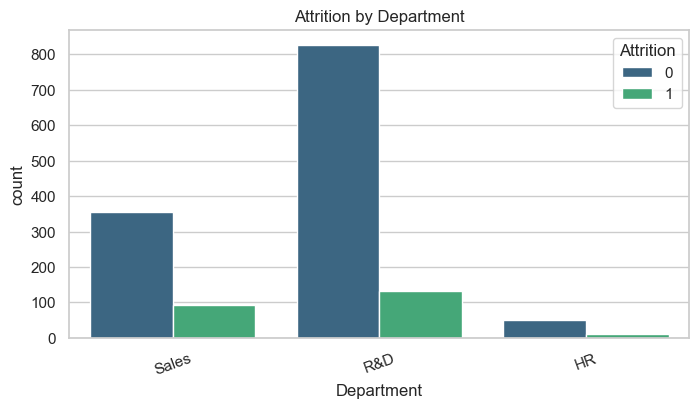

In [9]:
# 2️⃣ Attrition by Department
if 'Department' in df.columns:
    plt.figure(figsize=(8,4))
    sns.countplot(x='Department', hue='Attrition', data=df, palette='viridis')
    plt.title("Attrition by Department")
    plt.xticks(rotation=20)
    plt.show()

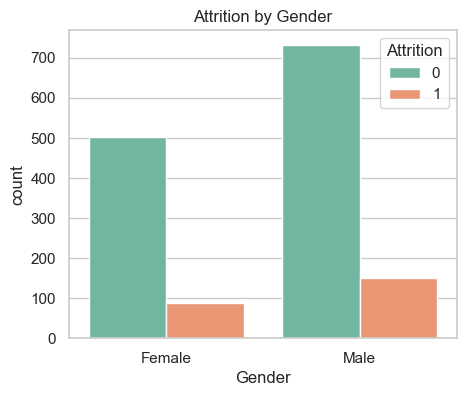

In [11]:
# 3️⃣ Attrition by Gender
if 'Gender' in df.columns:
    plt.figure(figsize=(5,4))
    sns.countplot(x='Gender', hue='Attrition', data=df, palette='Set2')
    plt.title("Attrition by Gender")
    plt.show()


In [37]:
# 4️⃣ Monthly Income vs Attrition
if 'MonthlyIncome' in df.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, palette='coolwarm')
    plt.title("Monthly Income vs Attrition")
    plt.show()

In [39]:
# 5️⃣ Job Satisfaction vs Attrition
if 'JobSatisfaction' in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x='JobSatisfaction', hue='Attrition', data=df, palette='mako')
    plt.title("Job Satisfaction vs Attrition")
    plt.show()

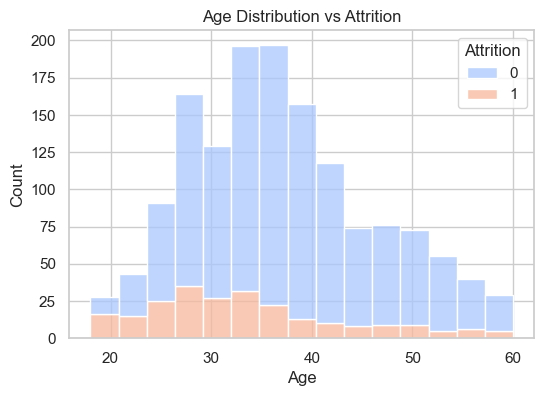

In [17]:
# 6️⃣ Age vs Attrition
if 'Age' in df.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x='Age', hue='Attrition', multiple='stack', bins=15, palette='coolwarm')
    plt.title("Age Distribution vs Attrition")
    plt.show()

In [35]:
print("\n✅ KEY INSIGHTS SUMMARY:")

if 'Department' in df.columns:
    top_dept = dept_attrition.idxmax()
    print(f"- Highest Attrition in Department: {top_dept}")

if 'Gender' in df.columns:
    top_gender = gender_attrition.idxmax()
    print(f"- Higher Attrition among: {top_gender}")

if 'AgeGroup' in df.columns:
    top_age = age_attrition.idxmax()
    print(f"- Most Attrition occurs in Age Group: {top_age}")

print("- Employees with lower income show higher attrition (see boxplot).")
print("- Job satisfaction and work-life balance strongly affect attrition.")
print("- Younger employees (under 35) tend to leave more frequently.")

print("\n🎯 Project Completed Successfully!")


✅ KEY INSIGHTS SUMMARY:
- Highest Attrition in Department: Sales
- Higher Attrition among: Male
- Most Attrition occurs in Age Group: 18-25
- Employees with lower income show higher attrition (see boxplot).
- Job satisfaction and work-life balance strongly affect attrition.
- Younger employees (under 35) tend to leave more frequently.

🎯 Project Completed Successfully!


In [41]:
pip install ipynbname


Note: you may need to restart the kernel to use updated packages.


In [43]:
import ipynbname

path = ipynbname.path()
print(path)


C:\Users\myaka\hr analytics.ipynb
